<div style="border: 2px solid #422e13; border-radius: 30px; background: #f2e9e1;">
    <div style="padding: 10px 10px 10px 0px; margin: 5px; border-radius: 23px; background: #488f31; text-align: center;">
        <span style="font-family: sans-serif; font-size: 38px; color: #fff;">Кластеризация клиентов</span>
    </div>
</div>


    
* [1. Импорт необходимых библиотек](#1)
    
* [2. Загрузка данных](#2)
    
* [3. Получение информации о датасете](#3)     
    * [3.1. Получение основной информации о датасете](#3.1)    
    * [3.2. Анализ пропущенных значений](#3.2)    
        
* [4. EDA(Exploratory Data Analysis)](#4)
    
* [5. Machine Learning](#5)
 
    * [5.1. Feature engineering ](#5.1)
    * [5.1. KMeans ](#5.2)
    * [5.3. DBSCAN](#5.3)
    * [5.4. Сравнение моделей](#5.4)

* [6.0. Выводы ](#6)

<a id="1"></a>

# <b>1 <span style='color:#422e13;font-family:cursive;'>|</span> Импорт необходимых библиотек</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pylab 
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CIA_Country_Facts.csv')

# 

<a id="2"></a>

# <b>2 <span style='color:#422e13;font-family:cursive;'>|</span> Загрузка данных</b>

In [3]:
df.head()

Country                               Region  Population  \
0     Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1         Albania  EASTERN EUROPE                          3581655   
2         Algeria  NORTHERN AFRICA                        32930091   
3  American Samoa  OCEANIA                                   57794   
4         Andorra  WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

# 

<a id="3"></a>

# <b>3 <span style='color:#422e13;font-family:cursive;'>|</span> Получение информации о датасете</b>

<a id="3.1"></a>

# <b>3.1 <span style='color:#422e13;font-family:cursive;'>|</span> Получение основной информации о датасете</b>

In [4]:
df.describe().T.style.background_gradient(cmap = "summer")

- Усредненные показатели по всем странам:
    1. Численность населения 28 млн.
    2. Площадь - 598 тыс квадратных миль.
    3. Количество человек на квадратную илю - 379.
    4. Отношение длины побережья к площади - 21.
    5. Разница иммигрантов к эммигрантам - 0.03.
    6. Смертность младенцев на 1000 родившихся детей - 35.
    7. ВВП на душу населения - 9689 долларов.
    8. Уроввень грамотности населения в процентах - 82%.
    9. Количестов телефонов на 1000 человек - 236;
    10. Процент пахотных земель - 13.8%.
    11. Процент площади земель, занимаемых сельскохозяйственными культурами (посевами) от общей площади определенной территории - 4.56%.
    12. Процент площади земель, занимаемых другими категориями использования, исключая пахотные земли и земли, занятые сельскохозяйственными культурами - 81.6%.
    13. Количество рождений на тысячу человек - 22;

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

- Общее количество строк - 227;
- Имеются пропущенные значения.

# 

<a id="3.2"></a>

### <b>3.2 <span style='color:#422e13;font-family:cursive;'>|</span> Анализ пропущенных значений</b>

In [6]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

- Пропущенные значения имеются во всех данных, кроме колонок с:
    - Названиями стран;
    - Регионами;
    - Численностью населения;
    - Площадью территории;
    - Плотность на 1000 кв.миль;
    - Отношение длины побережья к площади.

# 

<a id="4"></a>

# <b>4 <span style='color:#422e13;font-family:cursive;'>|</span> EDA(Exploratory Data Analysis)</b>

**Посмотрим какие страны есть в данных**

In [7]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Repub. of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji', 

# 

**Посмотрим на распределение регионов. В каком регионе наибольшее количество стран**

In [8]:
df['Region'].value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

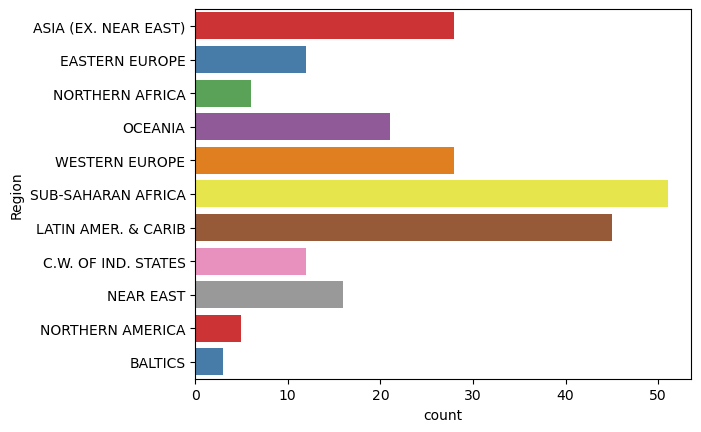

In [9]:
df['Region'] = df['Region'].apply(lambda x: x.strip())

sns.countplot(data=df,y='Region',palette='Set1')
plt.show()

In [10]:
print('Количестов регионов:', df['Region'].nunique())

Количестов регионов: 11


- Имеется 11 Регионов;
- Наибольшее количестов стран, которые располагаются к югу от Сахары.

# 

**Топ-5 стран по различным показателям**

In [11]:
# Напишем функцию для получения топ-5 стран по различным показателям
def get_top_countries(data, column, figsize=(8,22)):
    columns = data.drop(['Country','Region'],axis=1).columns.to_list()
    
    rows = int(np.ceil(len(columns) / 2))
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    ax = ax.flatten()
    
    if column == 'Country':
        fig.suptitle('Топ-5 стран по различным показателям')
        
    elif column == 'Region':
        fig.suptitle('Топ-5 регионов по различным показателям')
        
    fig.subplots_adjust(hspace=0.7,wspace=0.7,top=0.95)
    
    for idx, col in enumerate(columns):
        # Отсортируем датафрейм по численности
        if column == 'Country':
            sorted_df = data.sort_values(col,ascending=False).iloc[:5]
            sorted_df = sorted_df[[column,col]]
        elif column == 'Region':
            sorted_df = df.groupby(column)[col] \
                                    .agg('mean') \
                                    .reset_index() \
                                    .sort_values(col,ascending=False)
        # Нанесем данные на график
        sns.barplot(data=sorted_df, y = column, x = col,palette='viridis',ax=ax[idx])
        ax[idx].set_xticklabels(ax[idx].get_xticklabels(), rotation=30, fontsize=9)
        ax[idx].set_yticklabels(ax[idx].get_yticklabels(), fontsize=9)
        ax[idx].set_title(col, fontsize=11)
        ax[idx].set_xlabel('')
        ax[idx].set_ylabel('')

        
    if len(columns) < len(ax):
        for i in range(len(columns), len(ax)):
            fig.delaxes(ax[i])
    

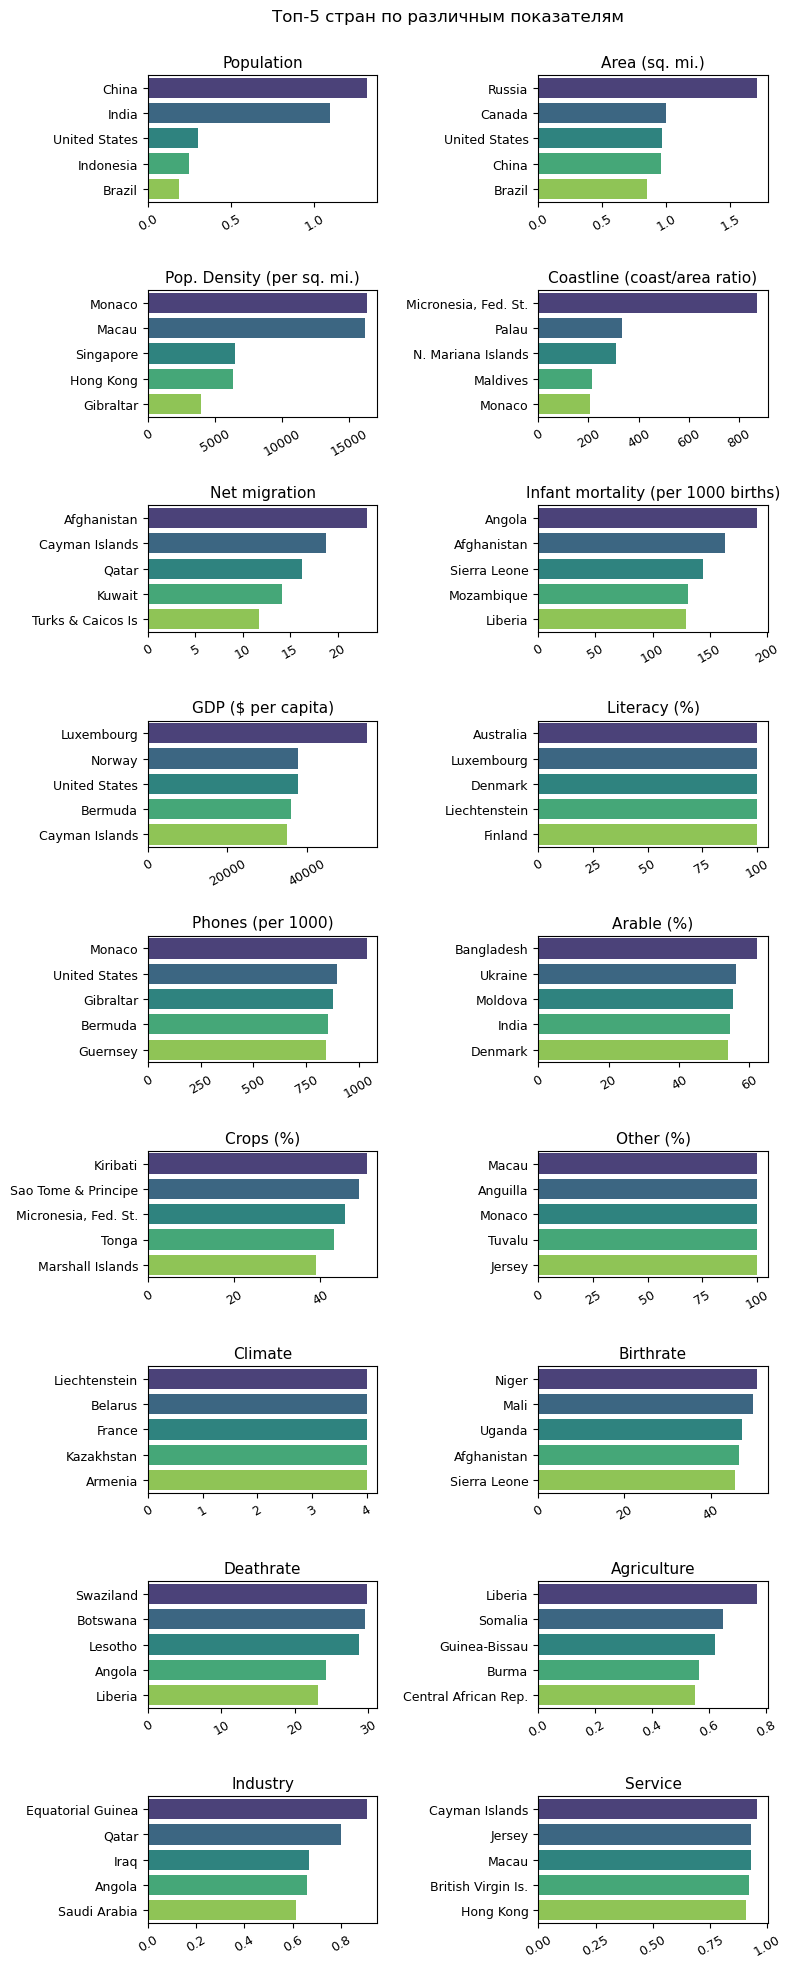

In [12]:
get_top_countries(data = df, column = 'Country')

- Выводы по показателям различных стран:
    1. Наибольшая численность человек в Китае.
    2. Самая большая страна по площади - Россия.
    3. Наибольшее количество человек на квадратную милю в Монако и Макао.
    4. Наибольшое отношение длины побережья к площади в Микронезии.
    5. Наибольший приток людей в Афганистан.
    6. Наибольшая смертность младенцев на 1000 родившихся детей в Анголе.
    7. Самый большой ВВП на душу населения в Люксембурге.
    8. На графике уровень грамотности показывает одинаков топ стран. Этот показатель рассмотрим отдельно.
    9. Наибольшее кол-во телефонов на 1000 человек в Монако.
    10. Наибольший процент пахотных земель в Бангладеш.
    11. Наибольший процент площади земель, занимаемых сельскохозяйственными культурами в Кирибати.
    12. Наибольший процент площади земель, занимаемых другими категориями использования одинаков для нескольких стран. Этот показатель также рассмотрим отдельно.
    13. Столбец с климатом также рассмотрим отдельно.
    14. Наибольшая рождаемость в Нигере.
    15. Наибольшая смертность в Эсватини.
    15. Наибольший ВВП от сельского хозяйства в Либерии.
    16. Промышленность наиболее развита в Экваториальной Гвинее.
    17. Услуги наиболее развиты на Острове Кайман.
    

# 

**Уровень грамотности в различных странах**

In [13]:
literacy_group = df \
                    .sort_values('Literacy (%)',ascending=False)[['Country','Literacy (%)']] \
                    .iloc[:20] \
                    .reset_index()  
literacy_group = literacy_group.drop('index',axis=1)
literacy_group

Country  Literacy (%)
0        Australia         100.0
1       Luxembourg         100.0
2          Denmark         100.0
3    Liechtenstein         100.0
4          Finland         100.0
5           Norway         100.0
6          Andorra         100.0
7          Iceland          99.9
8   Czech Republic          99.9
9          Estonia          99.8
10          Latvia          99.8
11          Poland          99.8
12         Ukraine          99.7
13        Slovenia          99.7
14           Samoa          99.7
15       Lithuania          99.6
16         Belarus          99.6
17          Russia          99.6
18      Tajikistan          99.4
19         Hungary          99.4

- У 7 стран имеется 100% уровень грамотности.

# 

In [14]:
other_group = df \
                    .sort_values('Other (%)',ascending=False)[['Country','Other (%)']] \
                    .iloc[:20] \
                    .reset_index()  
other_group = other_group.drop('index',axis=1)
other_group

Country  Other (%)
0                  Macau     100.00
1               Anguilla     100.00
2                 Monaco     100.00
3                 Tuvalu     100.00
4                 Jersey     100.00
5                  Nauru     100.00
6              Gibraltar     100.00
7              Greenland     100.00
8         Western Sahara      99.98
9               Djibouti      99.96
10               Iceland      99.93
11         French Guiana      99.81
12                  Oman      99.74
13              Suriname      99.57
14            Mauritania      99.51
15  Congo, Repub. of the      99.36
16              Botswana      99.34
17         New Caledonia      99.29
18              Mongolia      99.23
19                Kuwait      99.16

- В данных странах сельское хозяйство не развито. Мы вывели только 20 стран.

# 

In [15]:
climate_group = df \
                    .sort_values('Climate',ascending=False)[['Country','Climate']] \
                    .iloc[:20] \
                    .reset_index()  
climate_group = climate_group.drop('index',axis=1)
climate_group

Country  Climate
0          Liechtenstein      4.0
1                Belarus      4.0
2                 France      4.0
3             Kazakhstan      4.0
4                Armenia      4.0
5   Bosnia & Herzegovina      4.0
6             Cape Verde      3.0
7                 Greece      3.0
8                Ireland      3.0
9                  Chile      3.0
10                 Spain      3.0
11              Slovakia      3.0
12               Iceland      3.0
13               Hungary      3.0
14                Cyprus      3.0
15        Czech Republic      3.0
16                Rwanda      3.0
17               Denmark      3.0
18           Switzerland      3.0
19               Romania      3.0

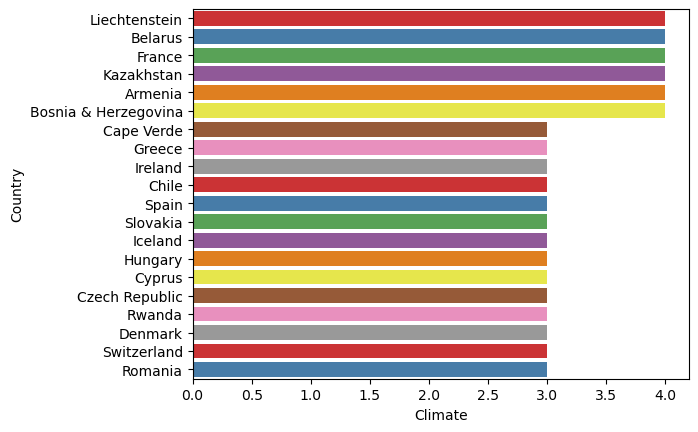

In [16]:
sns.barplot(data=climate_group, x='Climate',y='Country',palette='Set1');

- Некоторые страны имеют значения 4.0 в столбце "Climate". Возможно, это указывает на преобладание полярного или крайнего климата в этих странах, что может характеризоваться холодными и суровыми условиями.

- Страны с значениями 3.0 в столбце "Climate" могут иметь умеренный климат, который обычно характеризуется сезонностью с относительно мягкими зимами и теплыми летними периодами.

# 

**Теперь рассмотрим регионы по различным показателям**

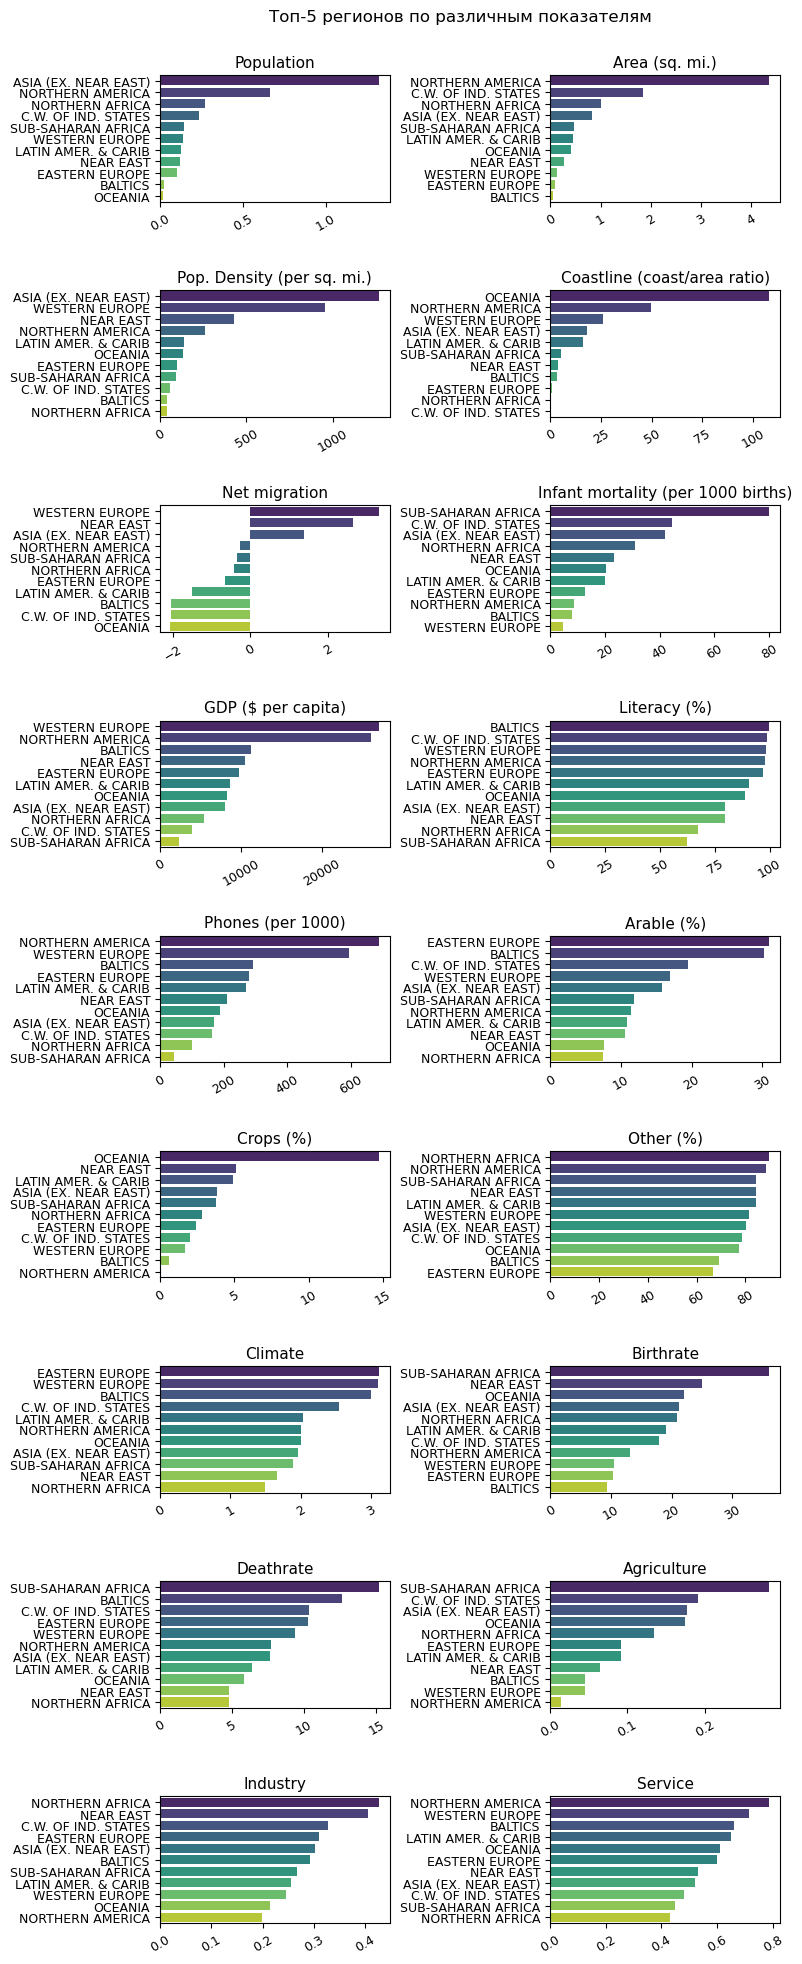

In [17]:
get_top_countries(data = df, column = 'Region')

- Выводы по показателям различных регионов:
    1. Наибольшая численность человек в Азии. Что логично, так как у Китая и Индии наибольшая численность. 
    2. Самая большой регион по площади - Северная Америка.
    3. Наибольшее количество человек на квадратную милю в Азии.
    4. Наибольшое отношение длины побережья к площади в Океании. Что впполне логично.
    5. Наибольший приток людей в Западную Европу. Наибольший отток людей из СНГ и стран Балтии.
    6. Наибольшая смертность младенцев на 1000 родившихся детей в Субсахарской Африке.
    7. Самый большой ВВП на душу населения в Западной Европе и Северной Америке.
    8. Уровень грамотности наибольший в странах Балтии и СНГ.
    9. Наибольшее кол-во телефонов на 1000 человек в Западной Европе и Северной Америке.
    10. Наибольший процент пахотных земель в Восточной Европе и странах Балтии.
    11. Наибольший процент площади земель, занимаемых сельскохозяйственными культурами в Окании.
    12. Наибольший процент площади земель, занимаемых другими категориями использования в Северной Африке и Северной Америке.
    13. Климат наиболее переменчив в Западной Европе и странах Балтии.
    14. Наибольшая рождаемость в СубСахаре.
    15. Наибольшая смертность в СубСахаре.
    15. Наибольший ВВП от сельского хозяйства в СубСахаре.
    16. Промышленность наиболее развита на Ближнем Востоке.
    17. Услуги наиболее развиты в странах Балтии.

# 

**Посмотрим на зависимость ВВП на душу населения от других факторов**

In [18]:
# Напишем функцию для получения зависимостоей ВВП стран от различных признаков
def GDP_correlation(data, columns, figsize=(10,25)):
    
    rows = int(np.ceil(len(columns) / 2))
    cols = 2
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    ax = ax.flatten()
    fig.suptitle('Корреляция ВВП на душу населения с другими признаками')
    fig.subplots_adjust(hspace=0.8,wspace=0.35,top=0.93)
    
    for idx, col in enumerate(columns):
        # Отсортируем датафрейм по численности

        sns.regplot(data=df,x='GDP ($ per capita)',y=col,line_kws={'color': 'red'},ax=ax[idx])
        # Нанесем данные на график
        ax[idx].set_xticklabels(ax[idx].get_xticklabels(), fontsize=9)
        ax[idx].set_yticklabels(ax[idx].get_yticklabels(), fontsize=9)
        ax[idx].set_title(col, fontsize=11)

    if len(columns) < len(ax):
        for i in range(len(columns), len(ax)):
            fig.delaxes(ax[i])

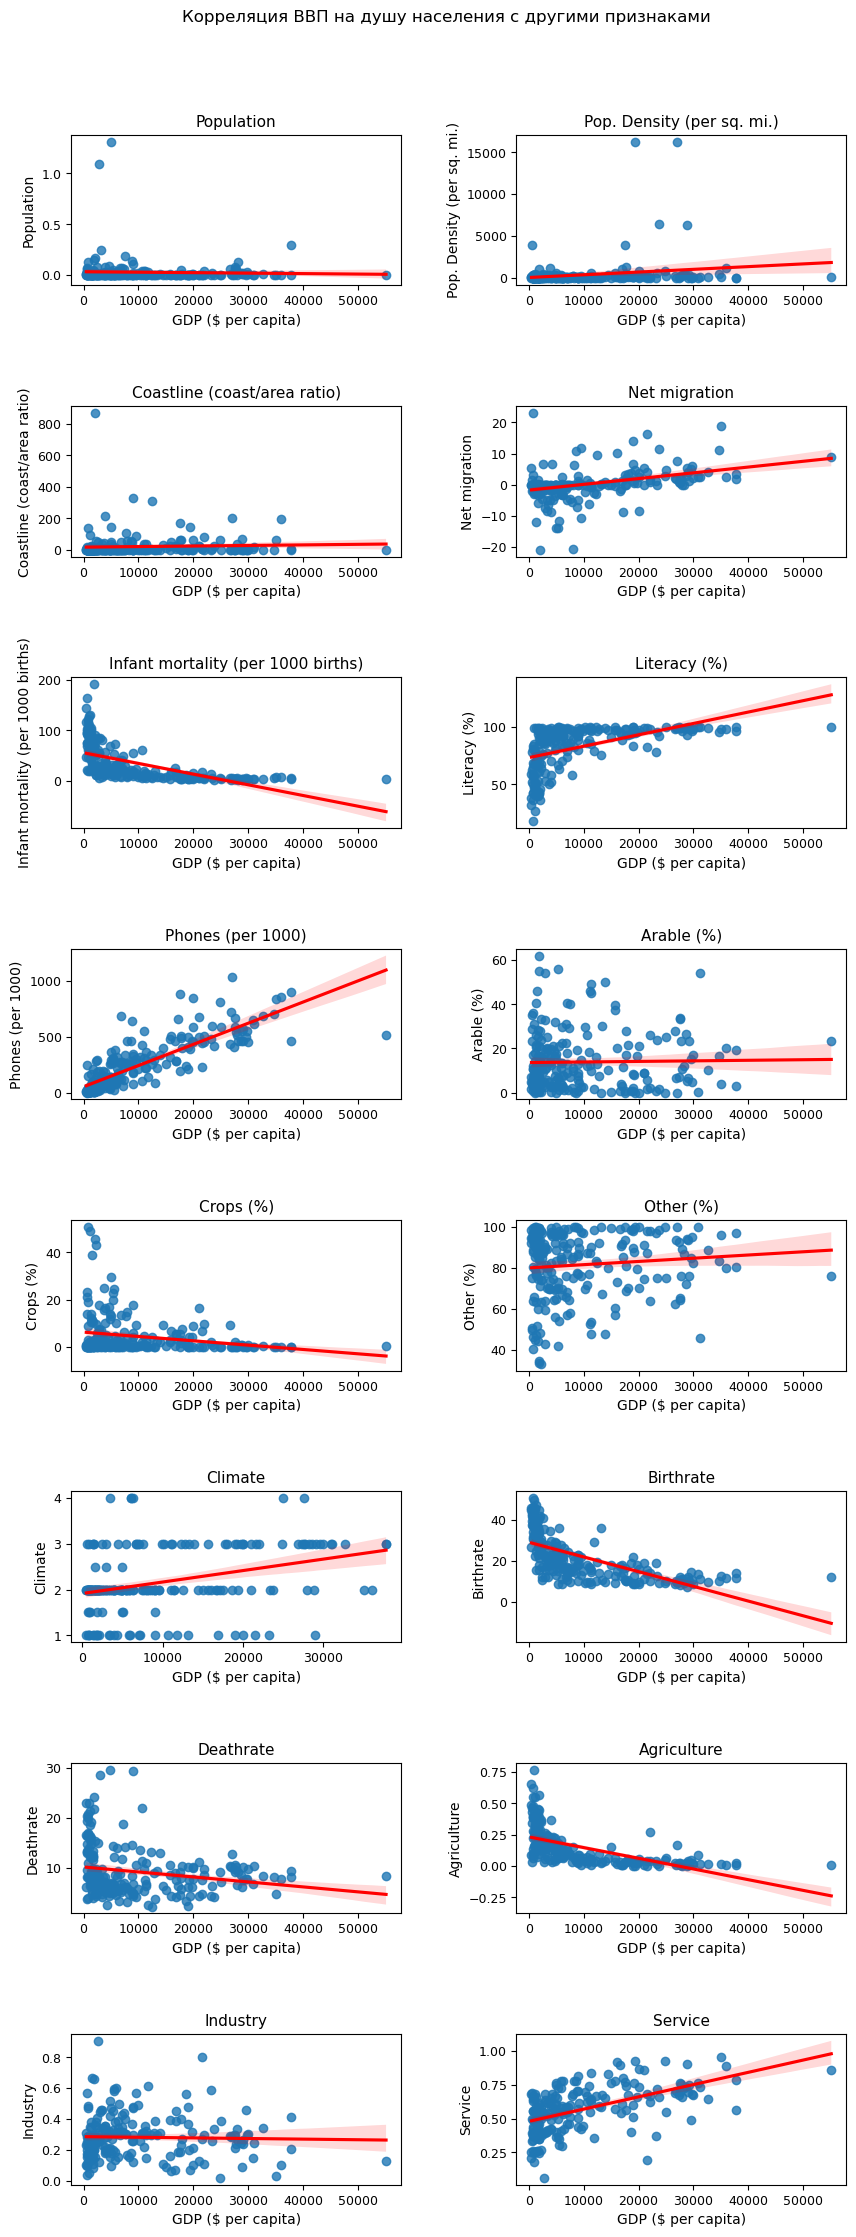

In [19]:
columns = df.drop(['Country',
                   'Region',
                   'Area (sq. mi.)',
                   'GDP ($ per capita)'],axis=1).columns.to_list()
GDP_correlation(data = df, columns = columns)

- Наблюдается корреляция между притоком людей в страну и ВВП на душу населения. У стран, где иммигранты превышают эмигрантов, больше рабочей силы, соответственно больше продукта можно создать.
- В странах с меньшей смертностью младенцев на 1000 родившихся наблюдается больше ВВП;
- Уровень грамотности влияет на величину ВВП. Чем лучше уровень грамотности, тем больше ВВП. Это довольно логичный факт, чем грамотнее люди, тем более лучшие продукты они могут создать. Это касается различных сфер;
- Количество телефонов на 1000 человек влиеят на ВВП. Что вполне логично, чем больше доходы населения, тем больше их покупательная способность;
- На графике наблюдается зависимость что чем меньше занимает площадь сельскохозяйственных земель, тем больше ВВП. Однако это не так явно коррелирует, т.к. есть страны с низким ВВП и низким процентов с/х земель. Поэтому скорее всего в выборке имеются страны, у которых кроме сельского хозяйства мало что развито и соответственно низкий уровень ВВП;
- В странах с более низкой рождаемостью больше ВВП на душу населения. К примеру, ранее мы выявили что наибольшая рождаемость в странах региона - Суб-Сахара. Данный регион не является достаточно развитым и там низкий ВВП на душу населения;
- Уровень смертности также влияет на ВВП. Чем меньше смертность, тем больше ВВП
- Страны, у которых сфера услуг достаточно развита, больше ВВП.

# 

**Посмотрим распределение ВВП на душу населения**

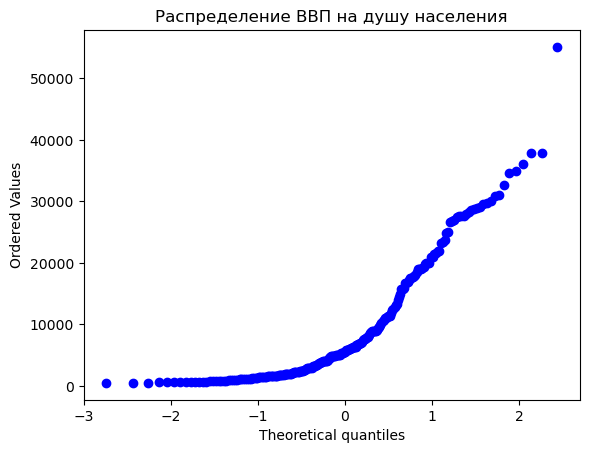

In [20]:
measurements = df['GDP ($ per capita)']
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title('Распределение ВВП на душу населения')
pylab.show()

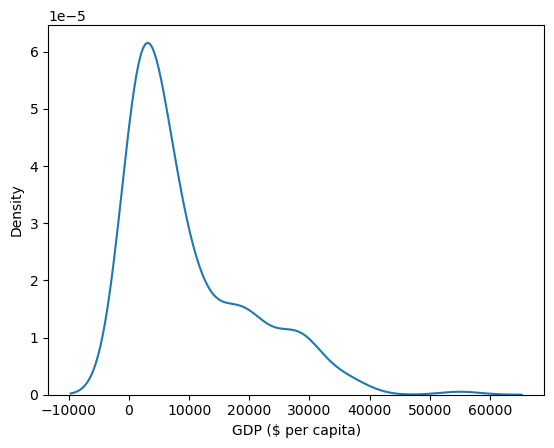

In [21]:
sns.kdeplot(data=df, x='GDP ($ per capita)');

- Распределение ВВП на душу населения не является нормальным.

# 

**Пострим графики boxplot**

In [22]:
# Напишем функцию для отображения box графиков
def box_visualization(df, columns, figsize=(12, 15)):
    rows = int(np.ceil(len(columns) / 3))
    cols = min(len(columns), 3)
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    ax = ax.flatten()

    for idx, col in enumerate(columns):
        sns.boxplot(data=df, y=col, ax=ax[idx])
        ax[idx].set_title(col)
        ax[idx].set_ylabel('')

    if len(columns) < len(ax):
        for i in range(len(columns), len(ax)):
            fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()


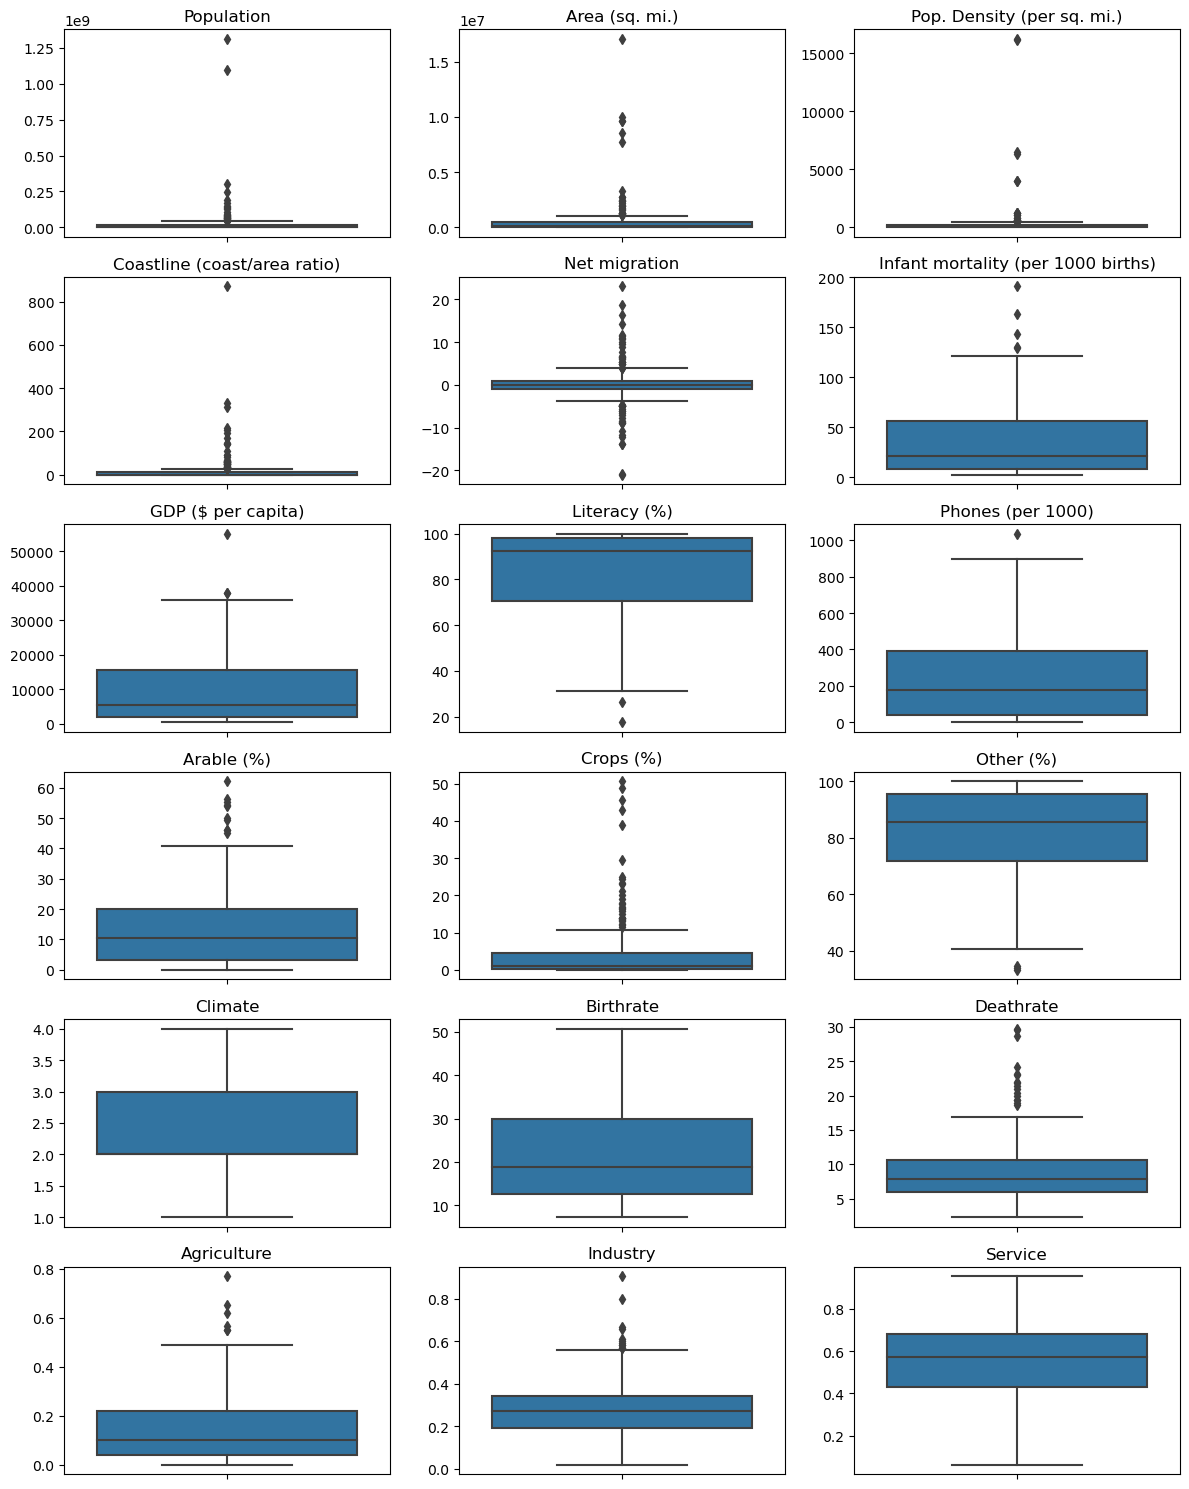

In [23]:
list_of_columns = df.drop(['Country', 'Region'], axis=1).columns.to_list()
box_visualization(df, list_of_columns)

- Имеется достаточное количестов стран, которые имеют большие отличия от основных значений. Сюда можно отнести следующие показатели:
    1. Численность населения. Ранее мы выявили что имеются страны с большой численностью, к прмеру Китай и Индия.
    2. Площадь территории.
    3. Плотность населения на 1000 человек.
    4. Отношение прибрежных районов  в площади.
    5. Приток людей в страну.
    6. Уровень смертности младенцев на 1000 человек.
    7. ВВП на душу населения.
    8. Количество телефонов на 1000 человек.
    9. Площадь пахотных, с/х земель, а также земли, занятыми другими категориями.
    10. Уровень смерности.
    11. ВВП от деятельности сельским хозяйством.
    12. Промышленность и услуги.
    

# 

**Иерархическая кластеризация данных**

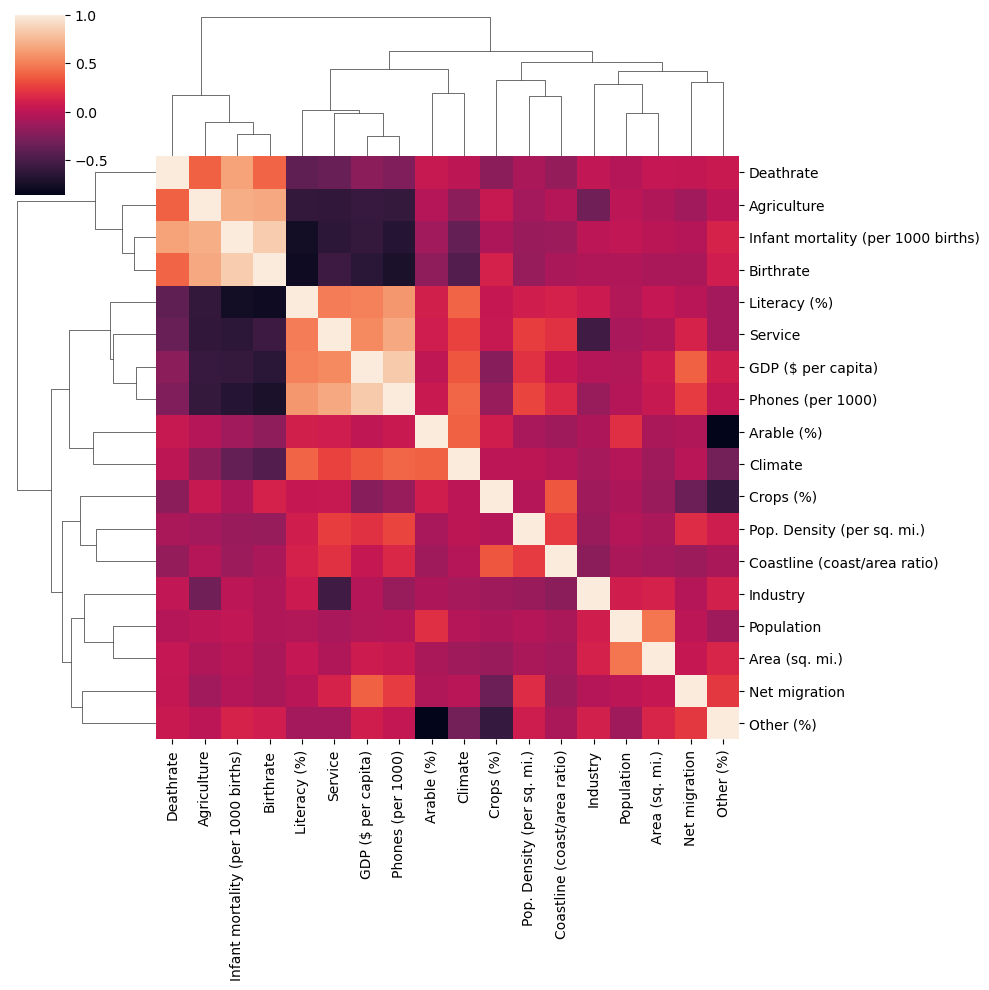

In [24]:
sns.clustermap(data=df.corr(numeric_only=True))

- Иерархическая кластеризация объединяет в кластеры по наиболее похожим признакам.
- Показатели, связанные друг с другом:
    1. Рождаемость и смерность младенцев на 1000 человек. После идет объединение этих признаков с ВВП от сельского хозяйства. После этого получается общий кластер, включая уровень смертности. 
        - Ранее мы выявили, что данные показатели наиболее высокие в странах Суб-Сахары.
    2. Страны с большой площадью и численностью населения. После этого объединяются с развитой промышленностью. 
        - Данные показатели были высокие в странах Азии, Северной Америке, СНГ.
    3. Плотность населения с количеством притока. После объединяются с показателем страны, в которой площадь земли занята другим категориями. 
        - Ранее выявили, что данные показатели высокие в странах Западной Европы, Ближнего Востока, Азии.
    4. ВВП на душу населения и количество телефонов на 1000 человек.
        - 4.1 Также уровень грамотности и развитием сферы услуг. 
        - После этого, все вышеперечисленные показатели из пункта 4 объединяются  водин кластер.
        Ранее мы выявили что данные показатели высокие в странах Западной Европы и Северной Америке.
    5. Площадь земель, занятыми с/х и отношением прибрежных районов к площади территории. После этого объединяются с показателем, где площадь территории занята в основном пахотными землями. 
        - Ранее мы выявили что данные показатели высокие в странах Окании.
    

# 

<a id="5"></a>

# <b>5 <span style='color:#422e13;font-family:cursive;'>|</span> Machine Learning</b>

<a id="5.1"></a>

### <b>5.1 <span style='color:#422e13;font-family:cursive;'>|</span> Feature engineering </b>

**Посмотрим для каких стран в колонке Agriculture значения NaN? Что эти страны имеют общего между собой?**

In [25]:
df[df['Agriculture'].isna()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Большинство этих стран являются маленькими островами, кроме Гринландии и Западной Сахары. Заменим для этих стран отсутствующие значения нулями, потому что это очень маленькие страны.**

In [26]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

**Для остальных столцбов заменим отсутствующие значения на средние показатели по региону**

In [27]:
# напишем функцию для замены отсутствующих значений на средние показатели по региону
def replace_nan(data, columns):
    for col in tqdm(columns):
        group_data = data.groupby('Region')[col].transform('mean')
        data[col] = data[col].fillna(group_data)


In [28]:
replace_nan(data = df, columns = df.columns[df.isnull().any()].tolist())

  0%|          | 0/12 [00:00<?, ?it/s]

In [29]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

- Все отсутствующие значения были удалены.

# 

**Создадим набор признаков X, причём колонка Region всё ещё является категориальной, поэтому для этой колонки создадим дамми-переменные с помощью Pandas.**

In [30]:
X = df.drop(['Country'],axis=1)
X = pd.get_dummies(X)

In [31]:
X.head()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
0    31056997          647500                        48.0   
1     3581655           28748                       124.6   
2    32930091         2381740                        13.8   
3       57794             199                       290.4   
4       71201             468                       152.1   

   Coastline (coast/area ratio)  Net migration  \
0                          0.00          23.06   
1                          1.26          -4.93   
2                          0.04          -0.39   
3                         58.29         -20.71   
4                          0.00           6.60   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   
1                               21.52              4500.0          86.5   
2                               31.00              6000.0          70.0   
3                                9.27              8000.0          97.0   
4                                4.05             19000.0         100.0   

   Phones (per 1000)  Arable (%)  ...  Region_BALTICS  \
0                3.2       12.13  ...               0   
1               71.2       21.09  ...               0   
2               78.1        3.22  ...               0   
3              259.5       10.00  ...               0   
4              497.2        2.22  ...               0   

   Region_C.W. OF IND. STATES  Region_EASTERN EUROPE  \
0                           0                      0   
1                           0                      1   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   Region_LATIN AMER. & CARIB  Region_NEAR EAST  Region_NORTHERN AFRICA  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0                       1   
3                           0                 0                       0   
4                           0                 0                       0   

   Region_NORTHERN AMERICA  Region_OCEANIA  Region_SUB-SAHARAN AFRICA  \
0                        0               0                          0   
1                        0               0                          0   
2                        0               0                          0   
3                        0               1                          0   
4                        0               0                          0   

   Region_WESTERN EUROPE  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1  

[5 rows x 29 columns]

# 

### Масштабирование данных

**Поскольку некоторые колонки измеряются в процентах, а некоторые в абсолютных значениях, выполним масштабирование признаков**

In [32]:
scaler = StandardScaler()
standard_scaled_X = scaler.fit_transform(X)
standard_scaled_X

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.31928318,
        -0.53830542, -0.37510468],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.14654488,  0.08642673, -0.21958445, ..., -0.31928318,
         1.85768146, -0.37510468],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.31928318,
         1.85768146, -0.37510468]])

# 

<a id="5.2"></a>

### <b>5.2 <span style='color:#422e13;font-family:cursive;'>|</span> KMeans </b>

**Напишим цикл for для создания и обучения нескольких моделей KMeans, проверяя количество кластеров K от 2 до 30. На каждом шаге цикла сохраним сумму квадратов расстояний от точек до центров кластеров (SSD - Sum of Squared Distances) для каждого значения K. Далее нанесем эти данные на график, изображая метрику SSD для различных значений К**

In [33]:
ssd = []
for k in tqdm(range(2,31)):
    model = KMeans(n_clusters = k)
    model.fit(standard_scaled_X)
    
    # Сумма квадратов расстояний (SSD - Sum of squared distances) от точек до центров кластеров
    ssd.append(model.inertia_)

  0%|          | 0/29 [00:00<?, ?it/s]

# 

**Построим график для отображения метрики SSD по разным значениям кластером k**

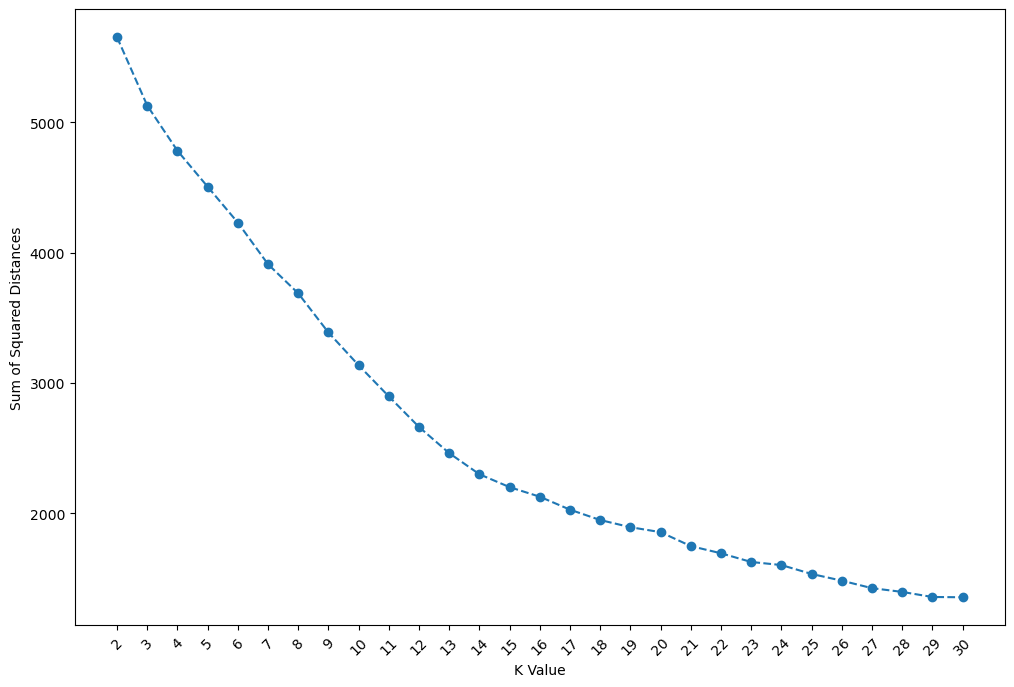

In [34]:
plt.figure(figsize=(12,8))

plt.plot(range(2,31),ssd,'--o')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")
plt.xticks(range(2,31),rotation=45)
plt.show()

# 

**Отобразим разницу между двумя подряд идущими значеняими**

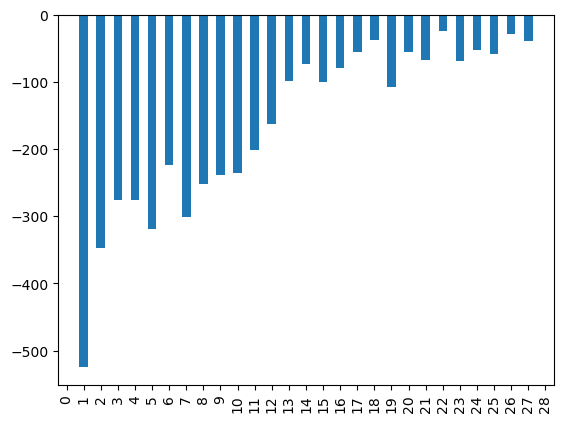

In [35]:
pd.Series(ssd).diff().plot(kind='bar');

# 

# Интерпретация модели

**Поскольку это обучение без учителя (unsupervised learning), здесь нет на 100% правильного ответа, для того чтобы выбрать максимально лучшее значение k. Все зависит от первоначальной задачи**
**Для примера возьмем значения k=3 и k=15, так как на графиках наименьшие спады метрики SSD по этим значениям**

In [36]:
model_k3 = KMeans(n_clusters=3)
model_k3.fit(standard_scaled_X)

KMeans(n_clusters=3)

In [37]:
X['K=3 Clusters'] = model_k3.labels_
df['K=3 Clusters'] = model_k3.labels_

**Посмотрим на корреляцию кластеров с различными показателями**

In [38]:
X.corr()['K=3 Clusters'].sort_values()

Region_WESTERN EUROPE                -0.561289
GDP ($ per capita)                   -0.559288
Phones (per 1000)                    -0.475532
Climate                              -0.397518
Deathrate                            -0.362779
Net migration                        -0.355271
Region_EASTERN EUROPE                -0.306420
Arable (%)                           -0.251272
Service                              -0.232601
Pop. Density (per sq. mi.)           -0.200177
Region_BALTICS                       -0.173169
Literacy (%)                         -0.099963
Region_SUB-SAHARAN AFRICA            -0.085922
Region_NORTHERN AMERICA              -0.080970
Region_ASIA (EX. NEAR EAST)           0.015529
Area (sq. mi.)                        0.023145
Coastline (coast/area ratio)          0.055451
Other (%)                             0.064272
Population                            0.066869
Infant mortality (per 1000 births)    0.070218
Agriculture                           0.087307
Industry     

In [39]:
X.corr()['K=3 Clusters'].sort_values().iloc[:5]

Region_WESTERN EUROPE   -0.561289
GDP ($ per capita)      -0.559288
Phones (per 1000)       -0.475532
Climate                 -0.397518
Deathrate               -0.362779
Name: K=3 Clusters, dtype: float64

In [40]:
X.corr()['K=3 Clusters'].sort_values().iloc[-6:-1]

Region_OCEANIA                0.213246
Birthrate                     0.228635
Region_NEAR EAST              0.246652
Crops (%)                     0.277581
Region_LATIN AMER. & CARIB    0.326441
Name: K=3 Clusters, dtype: float64

- Наиболее важные признаки для модели KMeans(k=3):
    1. Регион Латинской Америки.
    2. Процент площади с/х земель.
    3. Рождаемость.
    4. Регион Океания.
    5. Регион Ближнего Востока.
    6. Количество притока людей в страну.
    7. Климат.
    8. Количество телефонов на 1000 человек.
    9. Регион Западной Европы.
    10. ВВП на душу населения.

**Нанесем данные кластеры на географическую карту мира**

**Загрузим файл с ISO кодами для визуализации географической карты**

In [41]:
iso_codes = pd.read_csv("country_iso_codes.csv")
iso_codes.head()

Country  \
0                                      Afghanistan   
1  Akrotiri and Dhekelia – See United Kingdom, The   
2                                    Åland Islands   
3                                          Albania   
4                                          Algeria   

                                          ISO Code  
0                                              AFG  
1  Akrotiri and Dhekelia – See United Kingdom, The  
2                                              ALA  
3                                              ALB  
4                                              DZA

In [42]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
df['ISO Code'] = df['Country'].map(iso_mapping)

In [43]:
fig = px.choropleth(df, locations="ISO Code",
                    color="K=3 Clusters", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

In [44]:
print('Регионы и количество стран данных регионов для первого кластера')
df[df['K=3 Clusters']==0]['Region'].value_counts()

Регионы и количество стран данных регионов для первого кластера


WESTERN EUROPE          28
EASTERN EUROPE          11
ASIA (EX. NEAR EAST)     6
LATIN AMER. & CARIB      4
NORTHERN AMERICA         3
BALTICS                  3
OCEANIA                  2
C.W. OF IND. STATES      1
Name: Region, dtype: int64

In [45]:
print('Регионы и количество стран данных регионов для второго кластера')
df[df['K=3 Clusters']==1]['Region'].value_counts()

Регионы и количество стран данных регионов для второго кластера


SUB-SAHARAN AFRICA      45
ASIA (EX. NEAR EAST)     8
LATIN AMER. & CARIB      1
Name: Region, dtype: int64

In [46]:
print('Регионы и количество стран данных регионов для третьего кластера')
df[df['K=3 Clusters']==2]['Region'].value_counts()

Регионы и количество стран данных регионов для третьего кластера


LATIN AMER. & CARIB     40
OCEANIA                 19
NEAR EAST               16
ASIA (EX. NEAR EAST)    14
C.W. OF IND. STATES     11
NORTHERN AFRICA          6
SUB-SAHARAN AFRICA       6
NORTHERN AMERICA         2
EASTERN EUROPE           1
Name: Region, dtype: int64

# 

**Обучим модель KMeans=15**

In [47]:
model_k15 = KMeans(n_clusters=15)
model_k15.fit(standard_scaled_X)
df['K=15 Clusters'] = model_k15.labels_

In [48]:
X['K=15 Clusters'] = model_k15.labels_

In [49]:
X.corr()['K=15 Clusters'].sort_values().iloc[:5]

Region_LATIN AMER. & CARIB   -0.585704
Region_NORTHERN AFRICA       -0.238173
Other (%)                    -0.228164
K=3 Clusters                 -0.193557
Phones (per 1000)            -0.176105
Name: K=15 Clusters, dtype: float64

In [50]:
X.corr()['K=15 Clusters'].sort_values().iloc[-6:-1]

Population                     0.184232
Arable (%)                     0.236695
Agriculture                    0.293507
Region_EASTERN EUROPE          0.369691
Region_ASIA (EX. NEAR EAST)    0.539927
Name: K=15 Clusters, dtype: float64

- Для модели KMeans = 15 наиболее важные признаки для кластеризации:
    1. Регион Суб-Сахары.
    2. Уровень смертности.
    3. Смертность младенцев на 1000 родившихся..
    4. Рождаемость.
    5. Регион Западной Европы.
    6. Численность населения.
    7. Уровень грамотности.
    8. Плотность населения.
    9. Регион Восточной Европы.
    10. Регион Азии.
    
- Есть совпадения признаков с моделью KMeans = 3, но большинство признаков другие.

**Построим географическую карту для модели KMeans = 15**

In [51]:
fig = px.choropleth(df, locations="ISO Code",
                    color="K=15 Clusters", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

- Модель KMeans = 15 сделала более подробное разделение стран.

# 

<a id="5.3"></a>

### <b>5.3 <span style='color:#422e13;font-family:cursive;'>|</span> DBSCAN </b>

**С помощью DBSCAN и цикла for создадим набор моделей для различных значений параметра эпсилон. В качестве параметра min_samples возьмем значение 2 умножить на количество признаков. Во время цикла сохраним процент точек-выбросов**

In [52]:
percent_outliers = []

for eps in tqdm(np.linspace(0.1,10,50)):
    # Создаём модель
    model = DBSCAN(eps = eps, min_samples = 2*len(df.columns))
    model.fit(standard_scaled_X)
    
    # Сохраняем процент точек-выбросов (количество выбросов как процент от общего количества точек)
    perc_outliers = 100 * np.sum(model.labels_ == -1) / len(model.labels_)
    
    percent_outliers.append(perc_outliers)
    

  0%|          | 0/50 [00:00<?, ?it/s]

**Количество выбросов**

In [53]:
len(percent_outliers)

50

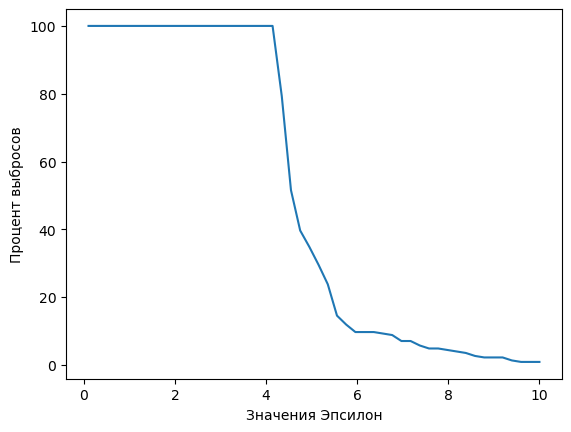

In [54]:
sns.lineplot(x=np.linspace(0.1,10,50),y=percent_outliers)
plt.xlabel('Значения Эпсилон')
plt.ylabel('Процент выбросов')
plt.show()

# 

**Создадим модель DBSCAN с значением eps = 6**
**Также сделаем min_samples = 1, т.к. модель DBSCAN определяет выбросы. В нашей задаче нужно сегментировать все страны**

In [55]:
dbscan = DBSCAN(eps=6,min_samples = 1)
dbscan.fit(standard_scaled_X)

DBSCAN(eps=6, min_samples=1)

In [56]:
df['DBSCAN_cluster'] = dbscan.labels_

In [57]:
df['DBSCAN_cluster'].value_counts().sort_index()

0     205
1       6
2       1
3       2
4       1
5       3
6       1
7       2
8       1
9       1
10      1
11      1
12      1
13      1
Name: DBSCAN_cluster, dtype: int64

# 

**Построим географическую карту для модели DBSCAN**

In [58]:
fig = px.choropleth(df, locations="ISO Code",
                    color="DBSCAN_cluster", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

- Модель DBSCAN по другому разделила страны на сегменты;


# 

<a id="5.4"></a>

### <b>5.4 <span style='color:#422e13;font-family:cursive;'>|</span> Сравнение моделей </b>

**Модель KMeans сегментирует страны наиболее правильно, нежели модель DBSCAN. При исследовательском анализе данных мы выявили некоторые зависимости различных регионов друг с другом, но модель DBSCAN объединила страны Центральной Азии вместе с Западной Европой и Регионом Африки. Поэтому модель KMeans лучше разделяет регионы и страны на сегменты, т.к при EDA мы наблюдали похожую картину зависимостей признаков друг с другом.**
- Итоговое значение k будет зависеть от конкретной задачи. Для своего примера я возьму лучшее значение k=15

# 

<a id="6"></a>

# <b>6 <span style='color:#422e13;font-family:cursive;'>|</span> Выводы </b>

    - В ходе анализа усредненных показателей по всем странам и выводов по показателям различных стран и регионов, мы выявили несколько важных закономерностей. Наблюдается сильная корреляция между притоком людей в страну и уровнем ВВП на душу населения. Страны с большим числом иммигрантов имеют более высокую рабочую силу и создают больше продукции, что приводит к увеличению ВВП.
    - Также было замечено, что страны с более низкой смертностью младенцев на 1000 родившихся имеют более высокий уровень ВВП. Это свидетельствует о тесной связи между качеством здравоохранения и экономическим развитием. Высокий уровень грамотности в населении также имеет положительное влияние на ВВП, так как грамотные люди способны создавать более качественные продукты и вести более разнообразные виды деятельности.
    - Показатель количества телефонов на 1000 человек также оказывает влияние на ВВП, что логично, поскольку он отражает уровень технологической развитости и покупательную способность населения.
    - Также мы обнаружили, что страны с меньшей долей площади, занимаемой сельскохозяйственными культурами, имеют более высокий ВВП. Однако, следует отметить, что эта зависимость не настолько явная, так как есть страны с низким ВВП, но с низкой долей сельскохозяйственных земель. Вероятно, в выборке присутствуют страны, где развитие идет преимущественно в других отраслях, а сельское хозяйство не является основным источником экономического роста.
    - Таким образом, на основе анализа данных мы пришли к выводу, что факторы, такие как миграция, здравоохранение, уровень грамотности, технологическое развитие и структура экономики, играют важную роль в определении уровня ВВП различных стран и регионов. Понимание этих.Важных факторов, влияющих на уровень ВВП, может помочь странам разрабатывать соответствующие стратегии и политики для стимулирования экономического роста и улучшения жизненного уровня населения.
    - Следует отметить, что ВВП является лишь одним из множества показателей, используемых для оценки экономического развития. Другие показатели, такие как индекс человеческого развития (ИЧР), индекс социального развития (ИСР) и показатели неравенства, также необходимо учитывать при комплексном анализе экономического развития страны.
    - Кроме того, важно отметить, что анализ усредненных данных может не учитывать различия и специфику каждой страны и ее региональных особенностей. Конкретные факторы, влияющие на ВВП, могут различаться в зависимости от контекста и условий каждой страны.
     - Таким образом, для полного понимания влияния различных факторов на ВВП необходимо провести более детальное и глубокое исследование, учитывающее множество факторов, контекст и динамику экономического развития каждой страны. Это позволит более точно определить приоритетные области для инвестиций и реформ, направленных на улучшение экономического развития и благосостояния населения.
     
     
     
    - Итоговая лучшая модель - KMeans=15 
     Результаты кластеризации по модели KMeans = 15 позволяют выделить наиболее важные признаки, определяющие группы стран. Эти признаки могут помочь понять особенности и характеристики каждого кластера:
    - Регион Суб-Сахары: Этот признак указывает на страны, расположенные в этом регионе, которые обладают сходными характеристиками и особенностями.
    - Уровень смертности: Этот признак может указывать на уровень медицинской инфраструктуры и доступность здравоохранения в разных кластерах.
    - Смертность младенцев на 1000 родившихся: Данный показатель связан с качеством медицинской помощи для новорожденных и может указывать на уровень здоровья и благополучия в каждом кластере.
    - Рождаемость: Этот признак может свидетельствовать о демографических тенденциях и различиях в плане рождаемости между кластерами.
    - Регион Западной Европы: Указывает на страны, входящие в этот регион, и подчеркивает их сходство по определенным характеристикам.
    - Численность населения: Этот признак указывает на различия в размере населения между кластерами и может быть связан с экономическими и социальными факторами.
    - Уровень грамотности: Показатель грамотности населения может отражать образовательную систему и доступность образования в каждом кластере.
    - Плотность населения: Этот признак указывает на различия в плотности населения между кластерами и может быть связан с уровнем развития инфраструктуры и доступности ресурсов.
    - Регион Восточной Европы: Подчеркивает страны, входящие в этот регион, и возможные сходства в их характеристиках и развитии.
    - Регион Азии: Указывает на страны, входящие в этот регион, и может указывать на их уникальные особенности и различия от других кластеров.
    - Анализ этих признаков позволяет увидеть сходства и различия между кластерами и выделить основные факторы, которые определяют их характеристики. Это может быть полезным для разработки стратегий развития и принятия решений, связанных с экономикой, здравоохранением, образованием и другими аспектами, влияющими на благосостояние стран и их населения.